<a href="https://colab.research.google.com/github/xiill/course_ml_itmo/blob/main/%5BWIP%5Dresearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка и проверка данных

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

clinical_data - наши клинические данные, обработанные, форматированные и тд.

In [5]:
clinical_data = pd.read_csv('/content/clinical_data_bin_cl.csv', sep=';', skiprows=2)

изменены колонки (ST_DAYS/MI_DAYS/MACE_ABI) содержащие информацию о кол-во дней. 





Для многоклассофой классификации:
Если не было данных - "-1"


0 дней - "0"


1-2-3 дня - "1"



Больше дней - "2"

Для бинарной классификации:


Если у пациента нет осложнений = "1". Получено из "-1.


Если у пациента были осложнения = "0". Получено из "0", "1", "2".

In [6]:
print(clinical_data['MACE_ABI'].value_counts())
print(clinical_data['ST_DAYS'].value_counts())
print(clinical_data['MI_DAYS'].value_counts())

1    493
0     52
Name: MACE_ABI, dtype: int64
-1    541
 0      2
 1      1
 2      1
Name: ST_DAYS, dtype: int64
-1    526
 0     11
 1      6
 2      2
Name: MI_DAYS, dtype: int64


In [7]:
clinical_data.shape

(545, 33)

In [8]:
clinical_data.head()

,ID,POST_3Y_IVUS,STENT,AGE,GENDER,CIGARETTE,HYPERTENSION,DYSILIPIDEMIA,PRIOR_MI,FAMILY_HISTORY,...,OVERLAPPING,ST,ST_DAYS,MI_DAYS,PRE_CK,PRE_CKMB,PRE_cTn,RATIO_PRE_CK,RATIO_PRE_CKMB,MACE_ABI
0,96286100114,0,2,64,1,0,1,1,0,0,...,0,0,-1,-1,34,0.50,0.1,0.174359,0.106383,1
1,96286100218,0,1,58,1,0,1,1,0,0,...,0,0,-1,-1,208,3.20,0.1,0.106667,0.680851,1
2,96286100419,0,1,49,1,1,0,1,1,0,...,1,0,-1,-1,48,1.30,0.1,0.246154,0.276596,1
3,96286100513,0,2,54,1,0,0,1,0,0,...,0,0,-1,-1,82,1.20,0.1,0.420513,0.255319,1
4,96286100913,0,1,67,1,0,1,1,0,1,...,0,0,-1,-1,154,2.75,0.3,0.789744,0.442122,1


In [9]:
clinical_data.describe()

,ID,POST_3Y_IVUS,STENT,AGE,GENDER,CIGARETTE,HYPERTENSION,DYSILIPIDEMIA,PRIOR_MI,FAMILY_HISTORY,...,OVERLAPPING,ST,ST_DAYS,MI_DAYS,PRE_CK,PRE_CKMB,PRE_cTn,RATIO_PRE_CK,RATIO_PRE_CKMB,MACE_ABI
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,...,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,8.044589e+10,0.702752,1.333945,61.603670,0.768807,0.236697,0.666055,0.715596,0.277064,0.357798,...,0.194495,0.007339,-0.987156,-0.946789,93.860550,2.427468,0.425552,0.425069,0.285955,0.904587
std,4.375298e+10,0.457466,0.472054,10.002793,0.421983,0.425445,0.472054,0.451544,0.447960,0.479793,...,0.396175,0.085434,0.165554,0.307555,67.635857,2.870671,1.617907,0.192026,0.386716,0.294054
min,9.628610e+09,0.000000,1.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000
25%,1.203661e+10,0.000000,1.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,57.000000,1.250000,0.200000,0.280513,0.212219,1.000000
50%,1.012501e+11,1.000000,1.000000,61.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,89.000000,1.890000,0.300000,0.435897,0.327974,1.000000
75%,1.077831e+11,1.000000,2.000000,69.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,-1.000000,-1.000000,97.000000,2.670000,0.300000,0.533333,0.463023,1.000000
max,1.235361e+11,1.000000,2.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,714.000000,29.000000,29.000000,0.989744,1.160000,1.000000


Проверка, что данные не содержат пустые значения


In [10]:
clinical_data.isnull().sum()

ID                      0
POST_3Y_IVUS            0
STENT                   0
AGE                     0
GENDER                  0
CIGARETTE               0
HYPERTENSION            0
DYSILIPIDEMIA           0
PRIOR_MI                0
FAMILY_HISTORY          0
DIABETES_INSULIN        0
BMI                     0
TOBACCO                 0
HYPERCHOLESTEROLEMIA    0
DIABETES                0
ANGINA                  0
POST_CK                 0
POST_CKMB               0
POST_cTn                0
cTn_5                   0
BAILOUT                 0
SEGMENT                 0
PERI_PROCEDURE_MI       0
OVERLAPPING             0
ST                      0
ST_DAYS                 0
MI_DAYS                 0
PRE_CK                  0
PRE_CKMB                0
PRE_cTn                 0
RATIO_PRE_CK            0
RATIO_PRE_CKMB          0
MACE_ABI                0
dtype: int64

Информация о данных - тип данных, количество

In [11]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    545 non-null    int64  
 1   POST_3Y_IVUS          545 non-null    int64  
 2   STENT                 545 non-null    int64  
 3   AGE                   545 non-null    int64  
 4   GENDER                545 non-null    int64  
 5   CIGARETTE             545 non-null    int64  
 6   HYPERTENSION          545 non-null    int64  
 7   DYSILIPIDEMIA         545 non-null    int64  
 8   PRIOR_MI              545 non-null    int64  
 9   FAMILY_HISTORY        545 non-null    int64  
 10  DIABETES_INSULIN      545 non-null    int64  
 11  BMI                   545 non-null    float64
 12  TOBACCO               545 non-null    int64  
 13  HYPERCHOLESTEROLEMIA  545 non-null    int64  
 14  DIABETES              545 non-null    int64  
 15  ANGINA                5

Вывод названий всех колонок

In [12]:
clinical_data.columns

Index(['ID', 'POST_3Y_IVUS', 'STENT', 'AGE', 'GENDER', 'CIGARETTE',
       'HYPERTENSION', 'DYSILIPIDEMIA', 'PRIOR_MI  ', 'FAMILY_HISTORY',
       'DIABETES_INSULIN', 'BMI', 'TOBACCO', 'HYPERCHOLESTEROLEMIA',
       'DIABETES', 'ANGINA', 'POST_CK', 'POST_CKMB', 'POST_cTn ', 'cTn_5',
       'BAILOUT', 'SEGMENT', 'PERI_PROCEDURE_MI', 'OVERLAPPING', 'ST',
       'ST_DAYS', 'MI_DAYS', 'PRE_CK', 'PRE_CKMB', 'PRE_cTn', 'RATIO_PRE_CK',
       'RATIO_PRE_CKMB', 'MACE_ABI'],
      dtype='object')

Визуализация в виде гистограммы распределения для выбранной колонки. Ожидается увидеть нормальное распределение.


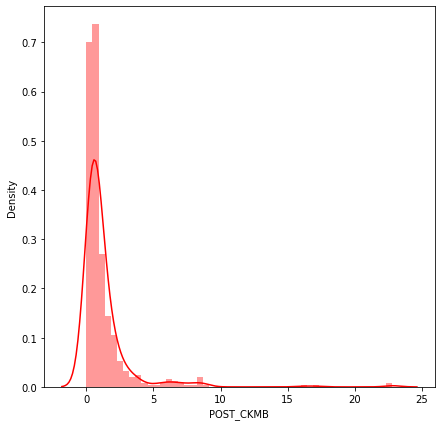

In [13]:
fig = plt.figure
fig,ax= plt.subplots(figsize=(7,7))
sns.distplot(clinical_data.POST_CKMB,color='red',label='POST_CKMB',ax=ax)
plt.show()

Строим график QQ (квантиль-квантиль) для ясности и уточнения значений. Если есть сильные отклонения от красной линии - не нормальное распределение.

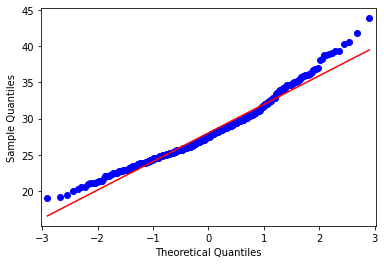

In [14]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(clinical_data.BMI, line='s')
plt.show()

# Визуализация данных

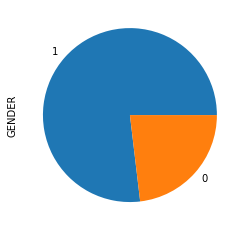

In [15]:
clinical_data['GENDER'].value_counts().plot(kind='pie');

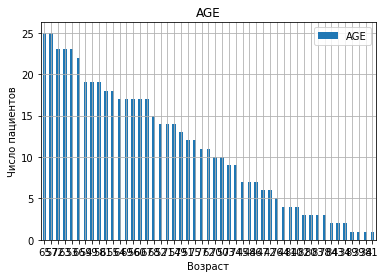

In [16]:
clinical_data['AGE'].value_counts().plot(
    kind='bar',
    rot=0, 
    title='AGE', 
    xlabel='Возраст',
    ylabel='Число пациентов',
    legend=True,
    grid=True
);

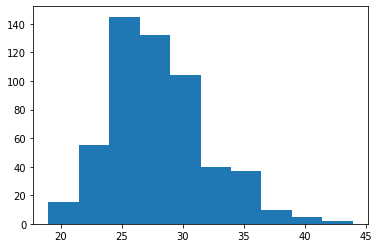

In [17]:
fig, ax = plt.subplots()
ax.hist(clinical_data['BMI']);

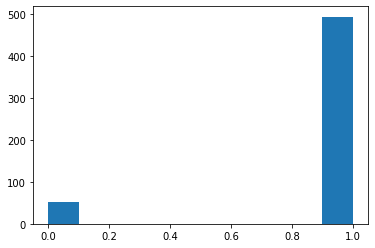

In [18]:
fig, ax = plt.subplots()
ax.hist(clinical_data['MACE_ABI']);

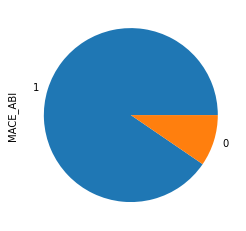

In [19]:
clinical_data['MACE_ABI'].value_counts().plot(kind='pie');

# Генерация и анализ синтетических данных

SDV или Synthetic Data Vault - это пакет Python для генерации синтетических данных на основе предоставленного набора данных. Сгенерированные данные будут иметь те же свойства формата и статистику, что и предоставленный набор данных. SDV генерирует данные, применяя математические методы и модели машинного обучения. С помощью SVD можно обработать данные, даже если они содержат несколько типов данных и отсутствующие значения.

In [20]:
pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.0/140.0 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

https://sdv.dev/SDV/user_guides/single_table/gaussian_copula.html

In [21]:
from sdv.tabular import GaussianCopula
from sdv.evaluation import evaluate

Cгенерируем синтетические данные на основе клинического набора данных. Используем для этого одну из доступных моделей SVD Singular Table GaussianCopula. Создадим экземпляр класса(передадим в параметр модели primary_key указав колонку ID, чтобы значения в ней были уникальными; output_file_path чтобы сразу записать данные в файл) и вызовем метод fit, передав данные.
После того как модель обучена, вызываем метод sample, указав количество строк, которые хотим сгенерировать.

In [22]:
model = GaussianCopula(primary_key='ID')
model.fit(clinical_data)
sample = model.sample(num_rows=1000, output_file_path='synthetic_data_1000.csv')

Сравним исходный набор данных с синтетическим набором с помощью функции evaluate. Результатом вызова функции является число от 0 до 1, которое показывает насколько похожи две таблицы: 0 - худший результат, 1 - наилучший возможный результат.

In [23]:
evaluate(clinical_data, sample)

0.8363005282179595

Функция оценки применяет набор предварительно настроенных метрических функций и возвращает среднее значение оценок, полученных данными для каждой из них, после их нормализации до диапазона 0–1 (смотреть на колонку raw_score). Чтобы увидеть различные метрики, которые были применены, нужно передать дополнительный аргумент aggregate = False, что заставит функцию оценки вернуть словарь с оценками, которые вернула каждая из функций метрик:

In [24]:
evaluate(clinical_data, sample, aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,KSComplement,Inverted Kolmogorov-Smirnov D statistic,0.836301,0.836301,0.0,1.0,MAXIMIZE,None
1,CSTest,Chi-Squared,NaN,NaN,0.0,1.0,MAXIMIZE,"Cannot find fields of types ('boolean', 'categ..."


Полный список возможных метрик (https://github.com/sdv-dev/SDV/blob/master/tutorials/evaluation/Evaluating_Synthetic_Data.ipynb):

**cstest**: эта метрика сравнивает распределения всех категориальных столбцов таблицы с помощью критерия хи-квадрат и возвращает среднее значение p, полученное по всем столбцам. Если таблицы, которые вы оцениваете, не содержат категориальных столбцов, результатом будет nan.


**kscomplement**: эта метрика сравнивает распределения всех числовых столбцов таблицы с двухвыборочным тестом Колмогорова-Смирнова с использованием эмпирического CDF и возвращает среднее значение статистических значений KS, полученных по всем столбцам. Если таблицы, которые вы оцениваете, не содержат числовых столбцов, результатом будет nan.


**logistic_detection**: эта метрика пытается использовать классификатор логистической регрессии, чтобы определить, является ли каждая строка реальной или синтетической, а затем оценивает ее производительность с помощью метрики «Площадь под кривой ROC». Возвращаемая оценка равна 1 минус оценка ROC AUC, полученная классификатором.


**svc_detection**: эта метрика пытается использовать классификатор опорных векторов, чтобы определить, является ли каждая строка реальной или синтетической, а затем оценивает ее производительность с помощью метрики площади под кривой ROC. Возвращаемая оценка равна 1 минус оценка ROC AUC, полученная классификатором.

In [25]:
evaluate(clinical_data, sample,  metrics=['LogisticDetection'], aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,LogisticDetection,LogisticRegression Detection,0.011081,0.011081,0.0,1.0,MAXIMIZE,None


Проверка и анализ сгенерированных синтетических данных

In [26]:
sample.shape

(1000, 33)

In [27]:
sample.columns

Index(['ID', 'POST_3Y_IVUS', 'STENT', 'AGE', 'GENDER', 'CIGARETTE',
       'HYPERTENSION', 'DYSILIPIDEMIA', 'PRIOR_MI  ', 'FAMILY_HISTORY',
       'DIABETES_INSULIN', 'BMI', 'TOBACCO', 'HYPERCHOLESTEROLEMIA',
       'DIABETES', 'ANGINA', 'POST_CK', 'POST_CKMB', 'POST_cTn ', 'cTn_5',
       'BAILOUT', 'SEGMENT', 'PERI_PROCEDURE_MI', 'OVERLAPPING', 'ST',
       'ST_DAYS', 'MI_DAYS', 'PRE_CK', 'PRE_CKMB', 'PRE_cTn', 'RATIO_PRE_CK',
       'RATIO_PRE_CKMB', 'MACE_ABI'],
      dtype='object')

In [28]:
sample.describe()

,ID,POST_3Y_IVUS,STENT,AGE,GENDER,CIGARETTE,HYPERTENSION,DYSILIPIDEMIA,PRIOR_MI,FAMILY_HISTORY,...,OVERLAPPING,ST,ST_DAYS,MI_DAYS,PRE_CK,PRE_CKMB,PRE_cTn,RATIO_PRE_CK,RATIO_PRE_CKMB,MACE_ABI
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,0.54800,1.439000,61.23600,0.651000,0.354000,0.559000,0.578000,0.41600,0.450000,...,0.265000,0.0,-0.998000,-0.910000,92.892000,2.539760,0.681596,0.418415,0.275342,0.902000
std,288.819436,0.49794,0.496513,9.84201,0.476892,0.478448,0.496755,0.494126,0.49314,0.497743,...,0.441554,0.0,0.044699,0.286325,64.584235,2.614486,1.247276,0.184158,0.373579,0.297463
min,0.000000,0.00000,1.000000,35.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,-1.000000,-1.000000,0.000000,-1.000000,-0.998000,0.002712,-0.910700,0.000000
25%,249.750000,0.00000,1.000000,55.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,-1.000000,-1.000000,40.000000,0.500000,-0.357250,0.286650,0.035252,1.000000
50%,499.500000,1.00000,1.000000,61.00000,1.000000,0.000000,1.000000,1.000000,0.00000,0.000000,...,0.000000,0.0,-1.000000,-1.000000,80.500000,2.080000,0.480500,0.413977,0.276416,1.000000
75%,749.250000,1.00000,2.000000,68.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,0.0,-1.000000,-1.000000,138.000000,4.062500,1.440500,0.540902,0.549390,1.000000
max,999.000000,1.00000,2.000000,89.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,0.0,0.000000,0.000000,348.000000,13.180000,5.963000,0.987349,1.157882,1.000000


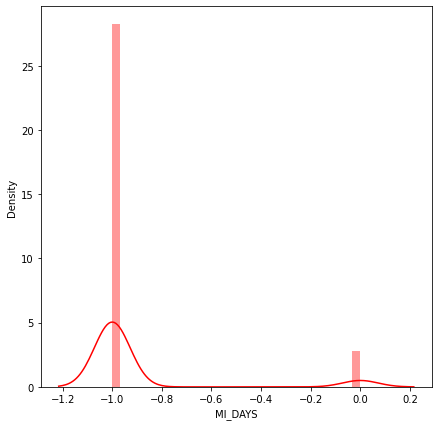

In [29]:
fig = plt.figure
fig,ax= plt.subplots(figsize=(7,7))
sns.distplot(sample.MI_DAYS,color='red',label='bmi',ax=ax)
plt.show()

изменить дни  на свою шкалу





убрать тех у кого отсутсвует много данных



модель на клинических, а предсказывать будет на синтетических


"хорошие" близкие к клиничеки - синтетические - объединить и обучать на них


поменять занчений в колонке ID


# Метрики задачи бинарной классификации

#### Подготовка данных

In [57]:
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyClassifier 
from sklearn.linear_model import LogisticRegression

In [58]:
y = 1 - clinical_data["MACE_ABI"] 
X = clinical_data[['ID','STENT', 'AGE', 'GENDER', 'CIGARETTE',
       'HYPERTENSION', 'DYSILIPIDEMIA', 'FAMILY_HISTORY',
       'DIABETES_INSULIN', 'BMI', 'TOBACCO', 'HYPERCHOLESTEROLEMIA',
       'DIABETES', 'ANGINA', 'POST_CK', 'POST_CKMB', 'POST_cTn ', 'cTn_5',
       'BAILOUT', 'SEGMENT', 'PERI_PROCEDURE_MI', 'OVERLAPPING', 'ST',
       'ST_DAYS', 'MI_DAYS', 'PRE_CK', 'PRE_CKMB', 'PRE_cTn', 'RATIO_PRE_CK',
       'RATIO_PRE_CKMB']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25) 

#### Построение baselines

DummyClassifier

In [59]:
dummy_clf = DummyClassifier(strategy="most_frequent") 
dummy_clf.fit(X_train, y_train);

Логистическая регрессия - более сложная модель

In [60]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train);

#### Accuracy








Accuracy (точность) - доля объектов, для которых мы правильно предсказали класс. 

Метрика не учитывает дисбаланс классов.

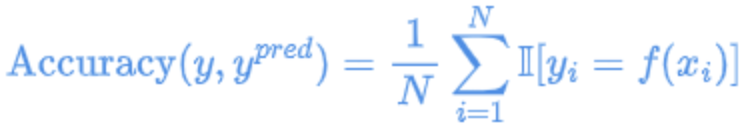

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
y_pred_dummy = dummy_clf.predict(X_test) 
accuracy_score(y_test, y_pred_dummy)

0.9197080291970803

In [63]:
y_pred_log_reg = log_reg.predict(X_test) 
accuracy_score(y_test, y_pred_log_reg)

0.9197080291970803

#### Precision & Recall (точность и полнота)

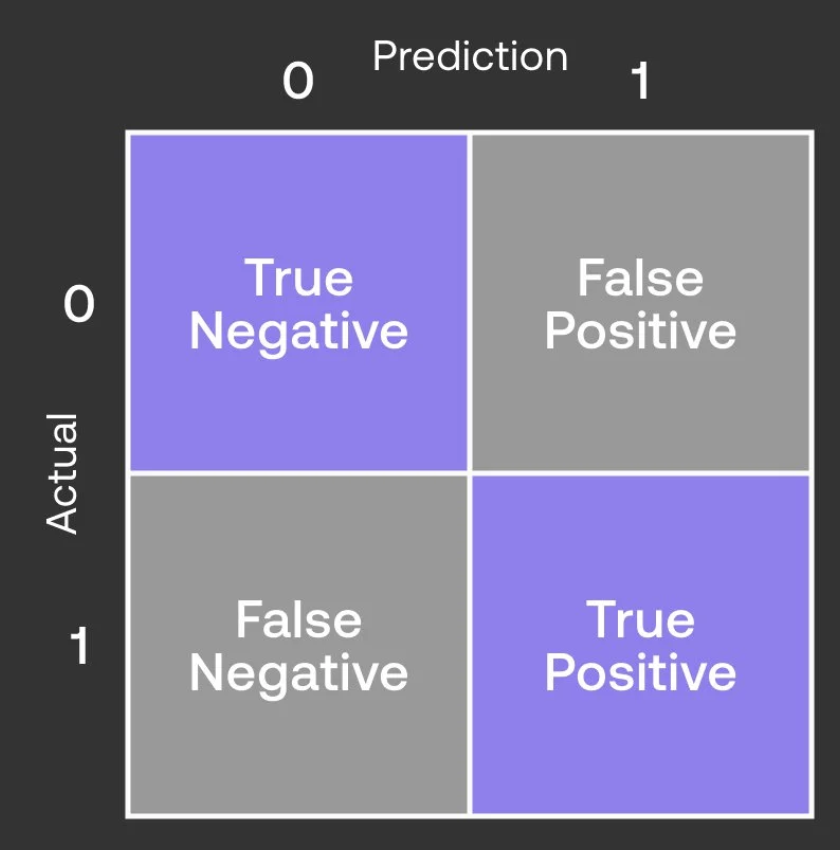

**TP** — истино-положительное решение;

**TN** — истино-отрицательное решение;

**FP** — ложно-положительное решение;

**FN** — ложно-отрицательное решение

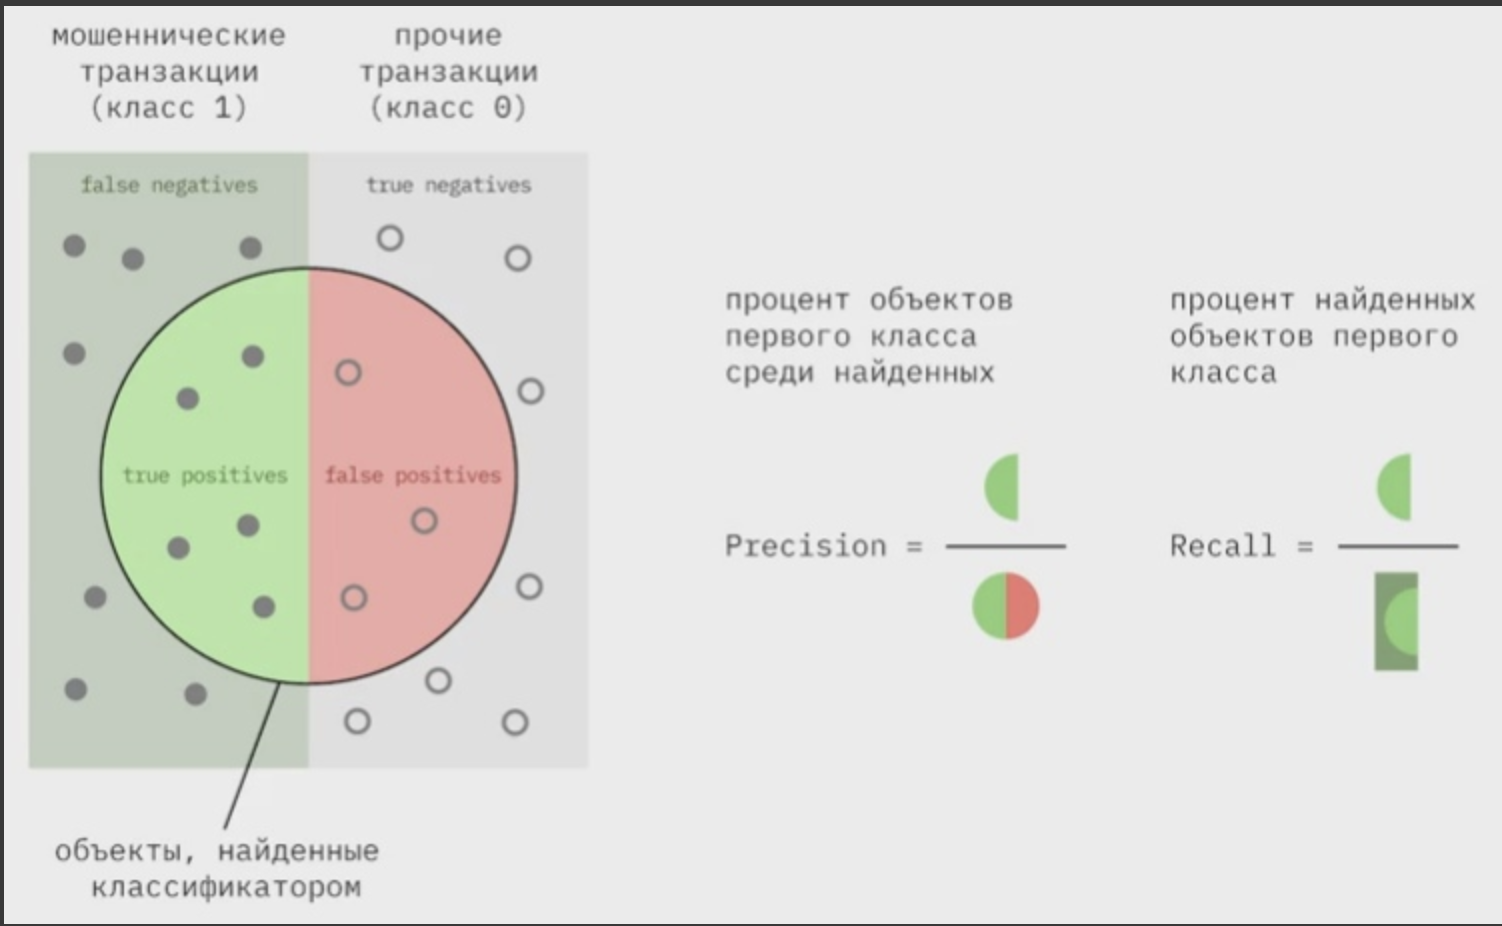

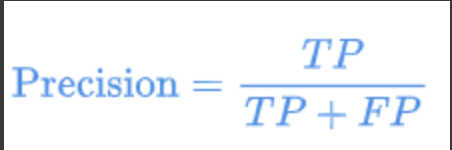

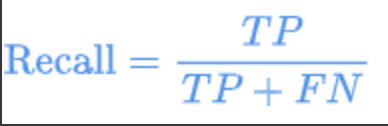

Матрица ошибок

In [64]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [65]:
confusion_matrix(y_test, y_pred_dummy)

array([[126,   0],
       [ 11,   0]])

In [66]:
confusion_matrix(y_test, y_pred_log_reg)

array([[126,   0],
       [ 11,   0]])

Так как один из классов находиться в меньшестве, то есть данные несбалансированные, то получаем 2-ой нулевой столбец так как к нему ничего и не попадает

In [67]:
print(f'Precision for Dummy Classificator: {precision_score(y_test, y_pred_dummy, zero_division=0)}')
print(f'Precision for Logistic regression: {precision_score(y_test, y_pred_log_reg, zero_division=0)}')

Precision for Dummy Classificator: 0.0
Precision for Logistic regression: 0.0


In [68]:
print(f'Recall for Dummy Classificator: {recall_score(y_test, y_pred_dummy)}')
print(f'Recall for Logistic regression: {recall_score(y_test, y_pred_log_reg)}')

Recall for Dummy Classificator: 0.0
Recall for Logistic regression: 0.0


Все плохо - полнота и точность у жвух безлайнов равна нулю.

#### F-мера

Более удобно, когда метрика выражена одним числом. F-мера - комбинация precision и recall. Она стремится к нулю, если точность или полнота стремится к нулю.


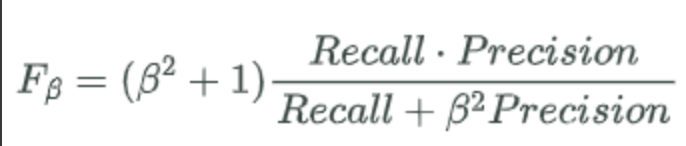

Более удобно, когда метрика выражена одним числом. F-мера - комбинация precision и recall. Она стремится к нулю, если точность или полнота стремится к нулю.

In [69]:
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import precision_recall_curve

In [70]:
print(f'F1-score for Dummy Classificator: {f1_score(y_test, y_pred_dummy)}')
print(f'F1-score for Logistic regression: {f1_score(y_test, y_pred_log_reg)}')

F1-score for Dummy Classificator: 0.0
F1-score for Logistic regression: 0.0


In [71]:
print(f'F1-score for Dummy Classificator (recall bias): {fbeta_score(y_test, y_pred_dummy, beta=2)}')
print(f'F1-score for Logistic regression (recall bias): {fbeta_score(y_test, y_pred_log_reg, beta=2)}')

F1-score for Dummy Classificator (recall bias): 0.0
F1-score for Logistic regression (recall bias): 0.0


In [72]:
print(f'Fbeta-score for Dummy Classificator (precision bias): {fbeta_score(y_test, y_pred_dummy, beta=0.5)}')
print(f'Fbeta-score for Logistic regression (precision bias): {fbeta_score(y_test, y_pred_log_reg, beta=0.5)}')

Fbeta-score for Dummy Classificator (precision bias): 0.0
Fbeta-score for Logistic regression (precision bias): 0.0


Что можно ожидать кроме нуля, если до этого все ноль...

Для оптимизации метрик можно перебрать пороги бинаризации при классификации (по умолчанию порог = 0.5), для каждого значения рассчитать precision и recall, а затем построить кривые метрик и выбрать оптимальное значение

In [73]:
y_pred = log_reg.predict_proba(X_test)[:, 1]

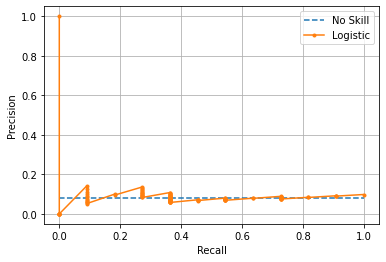

In [74]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

no_skill = len(y_test[y_test == 1]) / len(y_test)

plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

#### AUC ROC – площадь под ROC-кривой

Показывает долю ложно положительных примеров (false positive rate) в сравнении с долей истинно положительных примеров (англ. true positive rate).

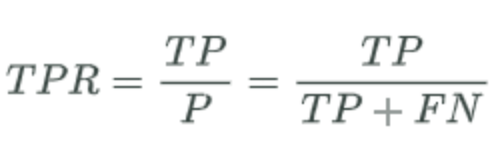

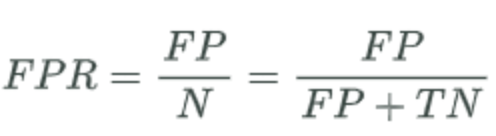

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

In [76]:
def plot_roc_auc(fpr, tpr, thresholds, title):
  plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
  plt.plot(fpr, tpr, marker='.', label='Logistic')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.grid()
  plt.show()

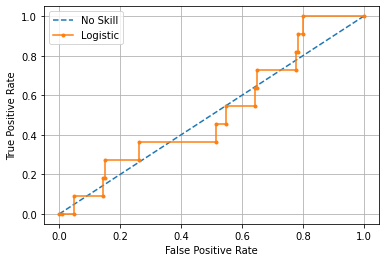

In [77]:
y_pred = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_auc(fpr, tpr, thresholds, title='Logistic regression')

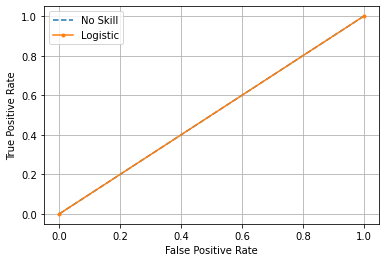

In [78]:
y_pred = dummy_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_auc(fpr, tpr, thresholds, title='Dummy')

## Логистическая регрессия

In [79]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes, load_breast_cancer, make_classification, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [80]:
y = 1 - clinical_data["MACE_ABI"] 
X = clinical_data[['ID','STENT', 'AGE', 'GENDER', 'CIGARETTE',
       'HYPERTENSION', 'DYSILIPIDEMIA', 'FAMILY_HISTORY',
       'DIABETES_INSULIN', 'BMI', 'TOBACCO', 'HYPERCHOLESTEROLEMIA',
       'DIABETES', 'ANGINA', 'POST_CK', 'POST_CKMB', 'POST_cTn ', 'cTn_5',
       'BAILOUT', 'SEGMENT', 'PERI_PROCEDURE_MI', 'OVERLAPPING', 'ST',
       'ST_DAYS', 'MI_DAYS', 'PRE_CK', 'PRE_CKMB', 'PRE_cTn', 'RATIO_PRE_CK',
       'RATIO_PRE_CKMB']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25) 

In [81]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_test_scaled = pd.DataFrame(
    # на момент записи лекции здесь была строчка fit_transform,
    # что неверно, так как мы всегда обучаем scaler и тому подобные объекты
    # только на train, а затем уже применяем к test части данных метод transform!
    scaler.transform(X_test), 
    columns=X_test.columns
)


In [82]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_preds_logreg = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_preds_logreg))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       126
           1       0.56      0.45      0.50        11

    accuracy                           0.93       137
   macro avg       0.75      0.71      0.73       137
weighted avg       0.92      0.93      0.92       137



In [83]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
y_preds_knn = knn.predict(X_test)
print(classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       126
           1       0.00      0.00      0.00        11

    accuracy                           0.91       137
   macro avg       0.46      0.49      0.48       137
weighted avg       0.84      0.91      0.87       137

